Q1.

TRANSFORMED DATA SIZE: (42000, 3)
TRANSFORMED DATA:  [[-13.00995949  -1.36067443   1.8415286 ]
 [ -8.20277013  -2.40116883   3.93505554]
 [ -7.08284012  -1.01667347   1.48611368]
 ...
 [  2.39583709   6.74048082  -0.36885384]
 [  6.73835108  -2.00979483   3.23564984]
 [  1.41939324   7.91793721   7.40985622]]
TRANSFORMED DATA SIZE: (42000, 10)
784


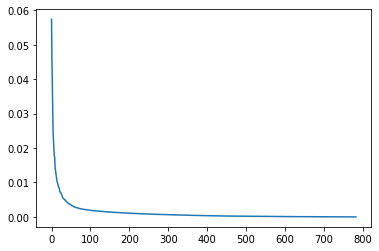

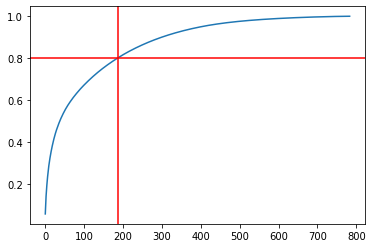

THE NUMBER OF FEATURES REQUIRED TO RETAIN 80% OF THE VARIANCE IS:  186


In [134]:
#(a) (d)

import numpy as np
from PIL import Image
import os
from numpy import *
from numpy.linalg import *
from matplotlib.pyplot import *

def part1_2(number_of_components):
    def covariance_matrix(x=np.array([])):
        x_centered = x - np.mean(x, axis=0)
        cov_matrix = np.dot(x_centered.T, x_centered) / (x_centered.shape[0] - 1)
        return cov_matrix

    def eigenvectors(cov_matrix):
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        return eigenvalues, eigenvectors
    
    def eigenvalues(cov_matrix):
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
        return eigenvalues

    def PCA_FROM_SCRATCH(data, num_components): 
        cov_matrix=covariance_matrix(data)
        cov_mat = np.cov(data.T)
        eig_vals, eig_vecs = eig(cov_mat)
        eig_vals_sorted = argsort(eig_vals)[::-1]
        eig_vecs_sorted = eig_vecs[:, eig_vals_sorted]
        eig_vecs_subset = eig_vecs_sorted[:, :num_components]
        cov_mat
        return data @ eig_vecs_subset

    print("PCA FROM SCRATCH")
    training_set_path = os.path.join(os.getcwd(), 'trainingSet', 'trainingSet')
    f = []
    for digit in range(0, 10):
        path = os.path.join(training_set_path, str(digit))
        f.extend([os.path.join(path, f) for f in os.listdir(path)])
    if '.DS_Store' in f:
        f.remove('.DS_Store')
    data = []
    for filename in f:
        img = Image.open(filename)
        arr = np.array(img)
        data.append(arr.flatten())
    data = np.array(data)
    #STANDARDIZE THE DATA 
    data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
    #PCA 
    transformed_data = PCA_FROM_SCRATCH(data, number_of_components)
    print(f'TRANSFORMED DATA SIZE: {transformed_data.shape}')
    print("TRANSFORMED DATA: " , transformed_data) 

def part4():
    def PCA(data, num_components):
        eigen_values, eigen_vectors = eig(cov(data.T))
        eig_values_sorted = argsort(eigen_values, kind='quicksort')[::-1]
        eig_vectors_sorted = take(eigen_vectors, eig_values_sorted, axis=1)
        eig_vecs_subset = eig_vectors_sorted[:, :num_components]
        return data @ eig_vecs_subset , eigen_values
    training_set_path = os.path.join(os.getcwd(), 'trainingSet', 'trainingSet')
    filenames = []
    for digit in range(0, 10):
        folder_path = os.path.join(training_set_path, str(digit))
        digit_filenames = os.listdir(folder_path)
        filenames.extend([os.path.join(folder_path, f) for f in digit_filenames])
    if '.DS_Store' in filenames:
        filenames.remove('.DS_Store')
    data = []
    for filename in filenames:
        img = Image.open(filename)
        arr = array(img)
        data.append(arr.flatten())
    data = array(data)
    #STANDARDIZE THE DATA 
    data = (data - mean(data, axis=0)) / std(data, axis=0)
    #PCA 
    transformed_data , eigen_value_array = PCA(data, 10)
    print(f'TRANSFORMED DATA SIZE: {transformed_data.shape[0] , transformed_data.shape[1]}')
    print(len(eigen_value_array))
    eigen_value_array.sort()
    eigen_value_array = eigen_value_array[::-1]
    # plot the eigen values ratio with its sum
    plot(eigen_value_array/784)
    figure()
    eigen_value_array = cumsum(eigen_value_array)
    plot(eigen_value_array/784)
    axhline(y=0.8, color='r', linestyle='-')
    x = 0
    for i in range(len(eigen_value_array)):
        if eigen_value_array[i]/784 > 0.8:
            x = i
            break
    axvline(x=x, color='r', linestyle='-')
    show()
    print("THE NUMBER OF FEATURES REQUIRED TO RETAIN 80% OF THE VARIANCE IS: ", x)

number_of_components = int(input("Enter the number of principal components for applying ICA from scratch: "))
part1_2(number_of_components)
part4()


(c)

In [132]:
import numpy as np
from PIL import Image
import os

def knn_predict(X_train, y_train, x_test, k):
    distances = np.sqrt(np.sum((X_train - x_test)**2, axis=1))
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_nearest_indices]
    return np.bincount(k_nearest_labels.astype(int)).argmax()

def PCA(data, num_components):
        folder_names = data[:, -1].astype(int)
        data = data[:, :-1]
        cov_mat = np.cov(data.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        eig_vals_sorted_idx = np.argsort(eig_vals)[::-1]
        eig_vecs_sorted = eig_vecs[:, eig_vals_sorted_idx]
        eig_vecs_subset = eig_vecs_sorted[:, :num_components]
        transformed_data = data @ eig_vecs_subset
        transformed_data = np.hstack((transformed_data, folder_names.reshape(-1, 1)))
        return transformed_data

while(1):
    k = int(input("Enter the value of k: "))
    if(k==-1):
        break
    num_components = int(input("Enter the number of principal components: "))
    print(num_components)
    training_set_path = os.path.join(os.getcwd(), 'trainingSet', 'trainingSet')
    filenames = []
    folder_names = []  # array to store the folder names
    for digit in range(10):
        folder_path = os.path.join(training_set_path, str(digit))
        digit_filenames = os.listdir(folder_path)
        filenames.extend([os.path.join(folder_path, f) for f in digit_filenames])
        folder_names.extend([digit] * len(digit_filenames))  # add folder name for each image
    if '.DS_Store' in filenames:
        filenames.remove('.DS_Store')
    data = []
    for filename, folder_name in zip(filenames, folder_names):
        img = Image.open(filename)
        arr = np.array(img)
        # add folder name as a separate row
        arr = np.append(arr.flatten(), folder_name)
        data.append(arr)
    data = np.array(data)
    data_no_folder = data[:, :-1]  # separate the data without folder name column
    data_no_folder = (data_no_folder - np.mean(data_no_folder, axis=0)) / np.std(data_no_folder, axis=0)
    data = np.hstack((data_no_folder, data[:, -1].reshape(-1, 1)))  # add back the folder name column
    #PCA 
    transformed_data = PCA(data, num_components)
    print(f'TRANSFORMED DATA SIZE: {transformed_data.shape[0] , transformed_data.shape[1]-1}')
    np.random.shuffle(transformed_data)
    train_size = int(0.8 * transformed_data.shape[0])
    test_size = transformed_data.shape[0] - train_size
    training_set = transformed_data[:train_size]
    test_set = transformed_data[train_size:]
    print(f'TRAINING SET SIZE: {training_set.shape[0] , training_set.shape[1]-1}')
    print(f'TEST SET SIZE: {test_set.shape[0] , test_set.shape[1]-1}')


    # iterate over each element in the test set
    accuracy_list = []
    for i in range(test_set.shape[0]):
        # get the features and true label of the current test element
        x_test = test_set[i, :-1]
        true_label = test_set[i, -1]
        # use k-Nearest Neighbors to predict the label of the current test element
        predicted_label = knn_predict(training_set[:, :-1], training_set[:, -1], x_test, k)
        # check if the predicted label matches the true label, and append 1 or 0 to the accuracy list accordingly
        if predicted_label == true_label:
            accuracy_list.append(1)
        else:
            accuracy_list.append(0)

    # calculate the accuracy of the k-Nearest Neighbors classifier
    accuracy = np.sum(accuracy_list) / len(accuracy_list)
    print(f'ACCURACY: {accuracy*100}')


5
TRANSFORMED DATA SIZE: (42000, 5)
TRAINING SET SIZE: (33600, 5)
TEST SET SIZE: (8400, 5)
ACCURACY: 72.79761904761905
25
TRANSFORMED DATA SIZE: (42000, 25)
TRAINING SET SIZE: (33600, 25)
TEST SET SIZE: (8400, 25)
ACCURACY: 94.03571428571429
125
TRANSFORMED DATA SIZE: (42000, 125)
TRAINING SET SIZE: (33600, 125)
TEST SET SIZE: (8400, 125)
ACCURACY: 94.66666666666667


ValueError: invalid literal for int() with base 10: ''

In [135]:
import numpy as np
from PIL import Image
import os

def knn_predict(X_train, y_train, x_test, k):
    distances = np.sqrt(np.sum((X_train - x_test)**2, axis=1))
    k_nearest_indices = np.argsort(distances)[:k]
    k_nearest_labels = y_train[k_nearest_indices]
    return np.bincount(k_nearest_labels.astype(int)).argmax()

def PCA(data, num_components):
        folder_names = data[:, -1].astype(int)
        data = data[:, :-1]
        cov_mat = np.cov(data.T)
        eig_vals, eig_vecs = np.linalg.eig(cov_mat)
        eig_vals_sorted_idx = np.argsort(eig_vals)[::-1]
        eig_vecs_sorted = eig_vecs[:, eig_vals_sorted_idx]
        eig_vecs_subset = eig_vecs_sorted[:, :num_components]
        transformed_data = data @ eig_vecs_subset
        transformed_data = np.hstack((transformed_data, folder_names.reshape(-1, 1)))
        return transformed_data

while(1):
    k = int(input("Enter the value of k: "))
    if(k==-1):
        break
    print("k=",k)
    # num_components = int(input("Enter the number of principal components: "))
    # print(num_components)
    training_set_path = os.path.join(os.getcwd(), 'trainingSet', 'trainingSet')
    filenames = []
    folder_names = []  # array to store the folder names
    for digit in range(10):
        folder_path = os.path.join(training_set_path, str(digit))
        digit_filenames = os.listdir(folder_path)
        filenames.extend([os.path.join(folder_path, f) for f in digit_filenames])
        folder_names.extend([digit] * len(digit_filenames))  # add folder name for each image
    if '.DS_Store' in filenames:
        filenames.remove('.DS_Store')
    data = []
    for filename, folder_name in zip(filenames, folder_names):
        img = Image.open(filename)
        arr = np.array(img)
        # add folder name as a separate row
        arr = np.append(arr.flatten(), folder_name)
        data.append(arr)
    data = np.array(data)
    data_no_folder = data[:, :-1]  # separate the data without folder name column
    data_no_folder = (data_no_folder - np.mean(data_no_folder, axis=0)) / np.std(data_no_folder, axis=0)
    data = np.hstack((data_no_folder, data[:, -1].reshape(-1, 1)))  # add back the folder name column
    transformed_data = data 
    print(f'TRANSFORMED DATA SIZE: {transformed_data.shape[0] , transformed_data.shape[1]-1}')
    np.random.shuffle(transformed_data)
    train_size = int(0.8 * transformed_data.shape[0])
    test_size = transformed_data.shape[0] - train_size
    training_set = transformed_data[:train_size]
    test_set = transformed_data[train_size:]
    print(f'TRAINING SET SIZE: {training_set.shape[0] , training_set.shape[1]-1}')
    print(f'TEST SET SIZE: {test_set.shape[0] , test_set.shape[1]-1}')


    # iterate over each element in the test set
    accuracy_list = []
    for i in range(test_set.shape[0]):
        # get the features and true label of the current test element
        x_test = test_set[i, :-1]
        true_label = test_set[i, -1]
        # use k-Nearest Neighbors to predict the label of the current test element
        predicted_label = knn_predict(training_set[:, :-1], training_set[:, -1], x_test, k)
        # check if the predicted label matches the true label, and append 1 or 0 to the accuracy list accordingly
        if predicted_label == true_label:
            accuracy_list.append(1)
        else:
            accuracy_list.append(0)

    # calculate the accuracy of the k-Nearest Neighbors classifier
    accuracy = np.sum(accuracy_list) / len(accuracy_list)
    print(f'ACCURACY: {accuracy*100}')


k= 2
TRANSFORMED DATA SIZE: (42000, 784)
TRAINING SET SIZE: (33600, 784)
TEST SET SIZE: (8400, 784)
ACCURACY: 91.11904761904762


Q2.

Average silhouette score for 2 clusters: 0.663492972101041
Average silhouette score for 3 clusters: 0.7757207540282335
Average silhouette score for 4 clusters: 0.8280630609708054
Average silhouette score for 5 clusters: 0.8762716155618357
Average silhouette score for 6 clusters: 0.7895780574125456
Average silhouette score for 7 clusters: 0.7847087500682649
BEST K:  5

UNCLUSTERED DATA


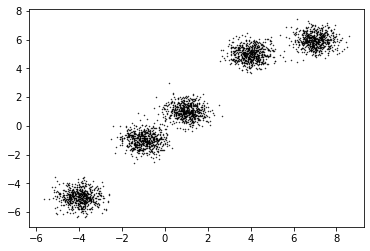

CENTROIDS
x: 7.023958208881911   y: 5.954036605539491
x: -0.9834598891608654   y: -0.9949923633379321
x: -3.9754973744085746   y: -4.965798533716299
x: 3.990745999402956   y: 4.999666070012503
x: 1.0112872710834746   y: 1.0192411950869642

CLUSTERED DATA


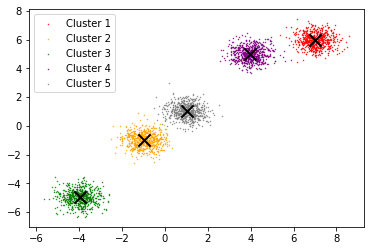

In [138]:
import numpy as np
from numpy import * 
from numpy.linalg import *
from matplotlib.pyplot import *

def eucledian_distance(x):
    return sqrt(sum(x**2))

def manhattan_distance(x):
    return sum(abs(x))

def k_means(data, k):
    centroids = {}
    #initialisng with first k points
    for i in range(k):
        centroids[i] = data[i]
    for i in range(300):
        classifications = {}
        for j in range(k):
            classifications[j] = []
        for j in data:
            #calculating closest centroid
            distances = [manhattan_distance(j - centroids[i]) for i in centroids]
            minimum_distance = min(distances)
            index_of_closest_centroid = distances.index(minimum_distance)
            classifications[index_of_closest_centroid].append(j)
        # this idea of using dictionary has been referred from the internet and has been modified according to my needs, I referred it since it is very efficient and fast and my code was taking too much time to run for large datasets
        prev_centroids = dict(centroids) #storing previous centroids , very quick to avoid problen oof too many iterations
        for j in classifications:
            #calculating new centroid
            centroids[j] = average(classifications[j], axis=0)
        # checking if centroids have converged
        flag = 1
        for j in centroids:
            if (sum((centroids[j] - prev_centroids[j])) > 0.1) or (sum((centroids[j] - prev_centroids[j]))<-0.1): #error till 0.1 is acceptable
                flag = 0
                break 
        if flag==1:
            break
        
    return centroids, classifications

def max(a, b):
    if a>b:
        return a
    else:
        return b

def calculate_silhouette_score(X, K):
    classifications = k_means(X, k=K)[1]
    silhouette_scores = []
    for i in range(0 , K):
        cluster = array(classifications[i])
        for j in range(0 ,len(cluster)):
            distances = zeros(len(X))
            for k in range(0 , len(cluster)):
                if (j != k):
                    distances[k] = eucledian_distance(cluster[j] - cluster[k])
            a = mean(distances[distances != 0])
            for l in range(K):
                if l != i:
                    distanc = zeros(len(X))
                    for k in range(0 , len(classifications[l])):
                        distanc[k] = eucledian_distance(cluster[j] - classifications[l][k])
                    b = mean(distanc[distanc != 0])
                    break
            silhouette_scores.append((b - a) / max(a, b))
    average_silhouette_score = mean(silhouette_scores)
    print(f"Average silhouette score for {K} clusters: {average_silhouette_score}")
    return average_silhouette_score

data = load("kmeans_data (1).npy")
global best_k , k
maximum_silhouette_score = 0
best_k = 0
for i in range(2, 10):
    score = calculate_silhouette_score(data, i)
    if(score > maximum_silhouette_score):
        maximum_silhouette_score = score
        best_k = i
print("BEST K: ", best_k)
k = best_k
# initial scatter plot
x_points = data[: , 0]
y_points = data[: , 1]
print("\nUNCLUSTERED DATA")
# scatter function plots the points without connecting them ie: without for loop, it is very fast and efficient and can be used for large datasets. this has been referred from: https://realpython.com/visualizing-python-plt-scatter/ 
scatter(x_points , y_points , s=0.2 , c="black")
show()
centroids = k_means(data , k)[0]
classifications = k_means(data , k=5)[1]
# print all centriod points
print("CENTROIDS")
for i in centroids:
    print('x:' , centroids[i][0] ," ",'y:', centroids[i][1])
cluster_colour_array = ['red' , 'orange' , 'green' , 'purple' , 'grey' , 'brown'  , 'yellow' , 'orange' , 'purple' , 'pink' , 'brown' , 'grey' , 'black']
print("\nCLUSTERED DATA")
# plot the points ba
for i in classifications:
    x_cluster_points = array(classifications[i])[: , 0]
    y_cluster_points = array(classifications[i])[: , 1]
    scatter(x_cluster_points , y_cluster_points , s=0.2 , c=cluster_colour_array[i] , label=f'Cluster {i+1}')
# plot the centroids
for i in centroids:
    scatter(centroids[i][0] , centroids[i][1] , s=150 , c = "black" , marker='x' , linewidths=2)
legend()
show()


In [ ]:
# THE PREVIOUS PART OF THE CODE, DEPENDING UPON THE INITIAL POINT GIVES K=3 or K=5 CLUSTERS
# HENCE WE CAN TAKE ANY OF THEM TO GET THE J VALUE, LET US TAKE BOTH CASES

In [139]:
import numpy as np
from numpy import *
from  numpy.random import *

def calculate_J(data, prototypes):
    membership_matrix = np.ones((num_samples, num_clusters))
    for i in membership_matrix:
        i *= 1/6000; 
        
    def distance(data , centers):
        return sqrt(sum((data[:, np.newaxis, :] - centers) ** 2, axis=2))
    

    for i in range(1000):
        centers = (membership_matrix.T @ data) / sum(membership_matrix, axis=0, keepdims=True).T
        centers += weight * prototypes * 0.7
        membership_matrix_next = 1 / (distance(data , centers) * distance(data , centers))
        membership_matrix_next /= sum(membership_matrix_next, axis=1, keepdims=True)
        membership_matrix = membership_matrix_next

    distances = np.zeros((3000, num_clusters))
    for i in range(3000):
        for j in range(num_clusters):
            distances[i, j] = abs(sum(data[i] - centers[j]))
    distances *= distances
    membership_matrix_fuzzified = membership_matrix*membership_matrix*distances
    J = membership_matrix_fuzzified
    return J

# THE PREVIOUS PART OF THE CODE, DEPENDING UPON THE INITIAL POINT GIVES K=3 or K=5 CLUSTERS
# HENCE WE CAN TAKE ANY OF THEM TO GET THE J VALUE, LET US TAKE BOTH CASES
#CASE 1
data = np.load("kmeans_data (1).npy")
def main(num_clusters):
    global fuzzifier, max_iterations, weight, num_samples, num_features, cluster_centres, prototypes, J_matrix
    fuzzifier = 2
    max_iterations = 100
    weight = 0.3
    num_samples = 3000
    num_features = 2
    #SELECTING CLUSTERS RANDOMLY
    cluster_centres = array([0,0]*num_clusters)
    prototypes = rand(num_clusters, num_features)
    J_matrix = calculate_J(data, prototypes)
    sum = 0 
    for i in range(3000):
        for j in range(num_clusters):
            sum += J_matrix[i,j]
    print("J value:", sum , "for C =", num_clusters)

#1
print("CASE 1")
num_clusters = 3
main(num_clusters)

#2
print("CASE 2")
num_clusters = 5
main(num_clusters)

CASE 1
J value: 12714.737622925426 for C = 3
CASE 2
J value: 1679.370158413365 for C = 5


Q3.

In [1]:
import numpy as np
from PIL import Image

def distance(p1, p2):
    return abs(int(p1[0])-int(p2[0]))+ abs(int(p1[1])-int(p2[1])) + abs(int(p1[2])-int(p2[2]))

def find_mean(arr):
    sum = 0
    for i in arr:
        sum+=i
    if(len(arr)==0):
        return -1
    else:
        return sum/len(arr)

#CONVERTING THE IMAGE TO RGB ARRAY
img = Image.open('peppers.png').convert('RGB')
width, height = img.size
pixels = np.zeros((width*height, 6), dtype=np.uint8)
visited = 0
for x in range(width):
    for y in range(height):
        i = y*width + x 
        r, g, b = img.getpixel((x, y))
        pixels[i] = [r, g, b, x, y , visited] 
#---------------SEGMENTATION BEGIN----------------
# for i in pixels:
#     i[0]= 0
# print(pixels)
bandwidth = 75
iterations = 1000
mean = 0
for k in range(10):
    ctr = 0
    for i in pixels:
        if(i[5] == 0):
            mean = ctr 
            break
        ctr+=1
    for iter in range(iterations):
        i = pixels[mean]
        ctr= 0
        arr = []
        for j in pixels:
            if(int(distance(i,j))<=bandwidth and j[5] == 0):
                j[0] = pixels[mean][0]
                j[1] = pixels[mean][1]
                j[2] = pixels[mean][2]
                j[5] = 1
                arr.append(ctr)
            ctr+=1
        mean = int(find_mean(arr))
        if(mean == -1):
            break
#---------------SEGMENTATION END----------------

# CONVERTING THE RGB ARRAY BACK TO THE IMAGE 
segmented_img = Image.new('RGB', (width, height))
for i in range(0 ,len(pixels)):
    r, g, b, x, y , visited= pixels[i]
    segmented_img.putpixel((i%width, i//width), (r, g, b))
segmented_img.save('pepper_segmented.png')
segmented_img.show()
print("SUCCESSFYLLY SAVED THE IMAGE AS pepper_segmented.png")

SUCCESSFYLLY SAVED THE IMAGE AS pepper_segmented.png


Q4.

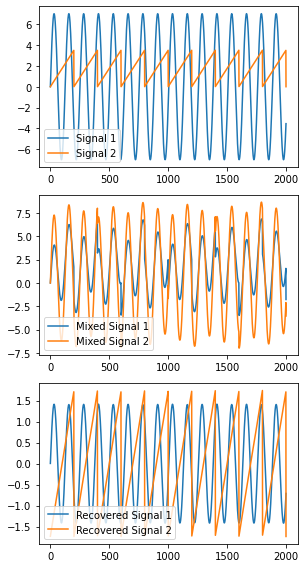

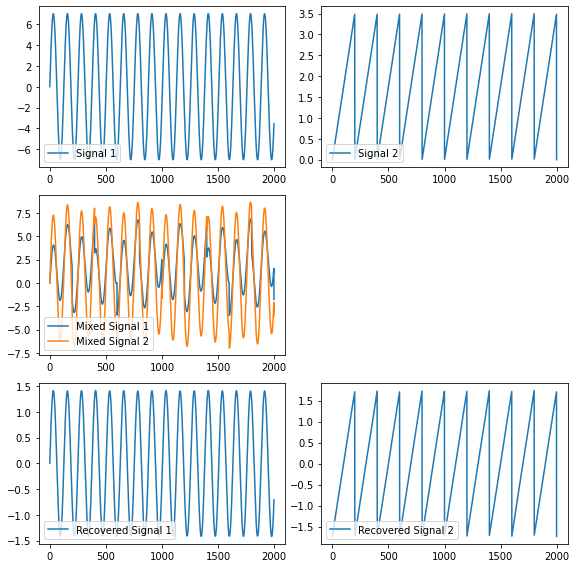

In [116]:
from numpy import * 
from numpy.linalg import * 
from matplotlib.pyplot import *

E = lambda x: eigh(cov(x))[1]
D = lambda x: sqrt(inv(diag(eigh(cov(x))[0])))
E_t = lambda x: eigh(cov(x))[1].T

def ICA(x):    
    #CENTERING 
    mean_value = mean(x , axis=1)
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i][j] -= mean_value[i]
    #WHITENING
    x = E(x) @ D(x) @ E_t(x) @ x
    #ICA
    components_nr = x.shape[0]
    W = zeros((components_nr, components_nr), dtype=x.dtype)
    for i in range(components_nr):
        w = random.rand(components_nr)
        for j in range(1000):
            w_ni = mean(x * np.tanh(w.T @ x), axis=1) - w * mean(1 - np.tanh(w.T @ x)**2)
            w_ni = w_ni / sqrt((w_ni ** 2).sum())
            if i >= 1:
                w_ni = w_ni - (w_ni @ W[0:i].T @ W[0:i])
            w_ni = w_ni / sqrt((w_ni ** 2).sum())
            if ((w * w_ni).sum()) > 0.99999 and ((w * w_ni).sum() < 1.00001) :
                break  
            else:
                w = w_ni  
        W[i] = w
    W = W.T
    return W.T @ x 

x = linspace(0, 5, 2000)
y1 = 7 * sin(20*x)  
y2 = 7 * (x % 0.5) 
mixing_matrix = array([
    [0.5, 1], 
    [1, 0.5]
])
mixed_signal1 = 0.5*y1 + 1*y2
mixed_signal2 = 1*y1 + 0.5*y2
mixed_signals = column_stack((mixed_signal1, mixed_signal2))
recovered_signal1 , recovered_signal2 = ICA(mixed_signals.T)[0] , ICA(mixed_signals.T)[1]

#PLOTTING
fig, axs = subplots(3, 2, figsize=(8, 8))
axs[0, 0].plot(y1, label='Signal 1')
axs[0, 0].plot(y2, label='Signal 2')
axs[0, 0].legend(loc='lower left')
axs[0, 0].legend(loc='lower left')
axs[1, 0].plot(mixed_signal1, label='Mixed Signal 1')
axs[1, 0].plot(mixed_signal2, label='Mixed Signal 2')
axs[1, 1].remove()
axs[1, 0].legend(loc='lower left')
axs[2, 0].plot(recovered_signal1, label='Recovered Signal 1')
axs[2, 0].plot(recovered_signal2, label='Recovered Signal 2')
axs[2, 0].legend(loc='lower left')
axs[2, 0].legend(loc='lower left')
axs[2, 1].remove()
axs[0, 1].remove()
tight_layout()
show()
fig, axs = subplots(3, 2, figsize=(8, 8))
axs[0, 0].plot(y1, label='Signal 1')
axs[0, 1].plot(y2, label='Signal 2')
axs[0, 0].legend(loc='lower left')
axs[0, 1].legend(loc='lower left')
axs[1, 0].plot(mixed_signal1, label='Mixed Signal 1')
axs[1, 0].plot(mixed_signal2, label='Mixed Signal 2')
axs[1, 1].remove()
axs[1, 0].legend(loc='lower left')
axs[2, 0].plot(recovered_signal1, label='Recovered Signal 1')
axs[2, 1].plot(recovered_signal2, label='Recovered Signal 2')
axs[2, 0].legend(loc='lower left')
axs[2, 1].legend(loc='lower left')
tight_layout()
show()



